# COGS 118A Final Project: Classifying Song Genre

#### Foreword: We decided to leave every simplified and formatted code block in this complete jupyter version, not only to display the implementation, but also easier for grader to make a suggestion or correction. 

#### Don't run the code, it will take about 40 minutes.


# Names

- Jerry Wang, A16149329
- Darius Azure, A15786330
- Miko Brown, A16237566


# Abstract 
Music has been created over thousands of years, people considered music as an expression of beauty, aesthetics, and art. However, it is rare to see people apply modern technology to analyze music. We want to explore the secret of music with in a more scientific and computational way.

The goal of our project is to classify song genre based on a variety of features describing the music. Our project tackles the problem of classifying song genre based on many variables including artist, song name, popularity, acousticness, danceability, energy, instrumentalness, key, tune, etc. 

The data contains entries with each of these features and their musical genre. We will create pipeline models to perform multi-classification on genre in the dataset. By comparing performance and metrics from different models, we will pick the highest accuracy model by comparing the metrics from each one.

In this project, we will try models including Logstic Regression, Random Forest, Boosting, and Neural Network.

In this project, we will use $f_1$ score to determine which model has the best performance. We will investigate precision and recall individually as well, but $f_1$ score will be the determining metric.

# Background

In the history of music, there was no such complex system to define music genre in earlier times. It was much more simple to categorize music according to its period of time<a name="wiki1"></a>[<sup>[1]</sup>](#wikinote1). After the 20th century, creative musicians brought different format of music to the stage so that people start to categorize the songs into genres. Song genre becomes more complicated as the technology develops. Nowadays, when facing countless music work, we cannot categorize a genre from its time. Instead, we may need to determine the music category based on its features, attributes, and listening response. 

A music genre or subgenre may be defined by the musical techniques, the cultural context, and the content and spirit of the themes<a name="wiki2"></a>[<sup>[2]</sup>](#wikinote2). This article describes how many people subjectively view genre of music. This is useful for human-beings, but difficult to classify large datasets of songs without listening to and understanding each song in depth. We can find that music genre itself is not easy to identify by individual factors from listening since people may have subjective thoughts. We tend to believe that there exists some more objective methods in machine learning to categorize music genre with computer algorithms.

Additionally, music genre is a dynamic concept. Due to the natural evolution of music, it may appear differently in different periods of time. Therefore, a listening response might be outdated if a genre is gradually disappearing or shifting to different formats<a name="newyorker"></a>[<sup>[3]</sup>](#newyorkernote). In contradiction, data implementation will not be affected by such evolution since data is measure objectively during that time period and measures a fixed in-time genre rather than a dynamic genre shifted from earlier times. For instance, the general keys of Jazz music in 1900s are different with Jazz music in 2020, but the computer will filter out the era's influence on keys.

# Problem Statement
Given different attributes of one song, what is its genre?

The problem is quantifiable, we can represent the problem as:

- Denote song entries $x_1$ to $x_n$ as X
- Denote song genre $y_1$ to $y_n$ as y
- Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. What is $\bar y_i$?

ML-relevant potential solution: Given $x_1$ to $x_n$, apply either LogisticRegression, RandomForest, Boosting, or Neural Network to get the prediction of its most likely class $y_i$.

The problem is measurable since we can evaluate the quantitative prediction performance with precision, recall, and f1 score.

The problem is replicable since our selected algorithms are generally deterministic, once the data of a song is obtained, the problem can be reproduced by applying the same algorithms.

In [1]:
# every necessary import
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

# Data
<a id='Data123'></a>
- source: interest in music, general search online for datasets; [author](https://www.kaggle.com/vicsuperman) is from Wellington, New Zealand; the origin source of the data is unknown, we obtained it from Kaggle platform

- reference: [Kaggle](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre), dataset search under classification

- dataset description: 17 of variables, 49944 of observations

- an observation consists of: instance_id, artist_name, track_name, popularity, acousticness, danceability,  duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained_date, valence, music_gengre

- Actually we are not sure what should be considered as critical variables since any of the attributes of a song can make a huge differerence on the song. Generally, the variables are presented in numerical values and categorical values and contains missing data.

- cleaning of extreme numerical values, unmatched type, different format of categorical values

- data missingness: if the data contains missing value, we need to first examine its type: Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR). Then, we need to apply the strategy from one of the following: 1. ignore missingness 2. fill with special value 3.fill with mean/median 4.fill with nearest data 5.fill with our model prediction. This decision will be further determined in the data part if we encounter data missing.


data load

In [2]:
#read data in dataframe
df = pd.read_csv("music.csv", header=0)
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
#check shape of dataframe
df.shape

(50005, 18)

check missingness

In [4]:
#check for missing data
if df.isnull().values.any():
    warnings.warn("missing data")

#print number of missing entries
print(df.isnull().sum().sum())

90


C:\Users\Ziyu\AppData\Local\Temp\ipykernel_18584\566493410.py:3: UserWarning: missing data
  warnings.warn("missing data")


There is some missing data, we observed our dataframe and found those missing are completely random for specific data points, so we decided to ignore them. We will update the decision in the future if necessary. Additionally, we decided to drop the "obtained_date" since it is just the date to obtain or receive the song, but not the date of release. So, it is totally irrelevant.

In [5]:
#drop missing data
df = df.dropna()
# drop obtained_date: the date when this music piece is collected, irrelavant in this data
df = df.drop(columns=['obtained_date'])

We might need to convert features into correct types for models later.

We find that in the **tempo** column, there are some **question marks: ?**, since the missing reason is unknown and sometimes song tempo is unknown when the source is unknown, we will ignore it.

In [6]:
#drop rows that have tempo equal to ?
df = df[df["tempo"] != "?"]
df.shape

(45020, 17)

Quantitive feature: popularity, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, mode, speechiness, tempo, valence, 12 features in total

Categorical feature: key, mode, 2 features in total

Unrelated feature: instance_id, artist_name, track_name, 3 features in total

One result label: music_genre

18 columns = $12+2+3+1$.

# Proposed Solution

Given $x_1$ to $x_n$, each $\vec x_i$ $\in \mathbb{R}^d$ with features $f_1$ through $f_d$. Predict 
the most likely class $y_i$.

The solution is applicable and appropriate since:
- Given features and observations, a multi-class classification is appropriate for this dataset since our true music genre has different categorical values.
- We will build different models to produce the prediction, for example(not limited to) KNN, SVM, Neural Networks, Decision Trees, Gradient Boosting... The performance will be evaluated quantitatively.
- We will use (repeated) K-fold cross validation to split test data and test our model performace with accuracy.
- Comparision through models will be performed.

Model selection:
- We selected these models based on our multi-class classification(not limited to): LogisticRegression, RandomForest, Boosting, and Neural Network
- We will use LogisticRegression as a first baseline model because it's predictive power is relatively low but it is easier to understand, we will present a trial and get a basic understanding of multi-label classification. Also, this is our very beginning learning from the lecture, so we decided to give a start.
- RandomForest is a ensemble learning of decision trees, it is easy to understand and interpret. This will make our algorithm easier to visualize to give context to how it makes it's decision.
- Boosting is another ensemble learning but different with bagging(forest), it allows us to improve and boost the weak learner from previous and focus on more mis-classified data.
- Neural network is our exploration, NN is large and complicated. We want to implement a rough network within a medium size of neurons and present a solid output.

# Evaluation Metrics

For our project we have chosen to focus on the evaluation metrics of precision, recall, and f1 score which we will use to try to evaluate how well our project is predicting the music genre. Due to having to store our data in a measurable way through our data cleaning to be quantifiable we need to see if we are handling these new variables are correctly being measured in a way where important comparisons have the proper weights. Since we need the project to be measurable we need to see that these variables that we cleaned are being weighed correctly which is why we will use f1 to try to compare our prediction of our training set to the actual genre to try to measure how many true postives and true negatives we have in our predictions in order to see how accurate our predictions are. We will use precision to determine how good we are at classifying a sample positively (quality of positive predictions). We will use recall to determine how good we are at detecting positive samples.

We can also compare these scores to try to see if there is any overlap between predicting certain genres and see if our different models have more power in predicting these songs better than others depending on our score that we get. In general using these different factors that we have deemed quantifiable we should check if we correctly measured the weight of these factors and see how we were truly able to identify the genre. 

# Visualization <a id='Visualization'></a>

We implemented some visualizations.

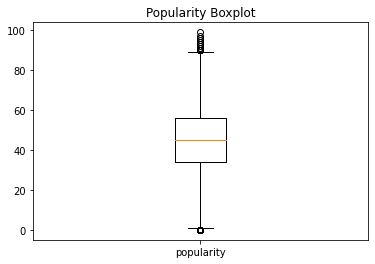

In [7]:
#box plot of popularity
plt.boxplot(df['popularity'], autorange=True, labels=['popularity'], manage_ticks=True, meanline=True)
plt.title('Popularity Boxplot')
plt.show()

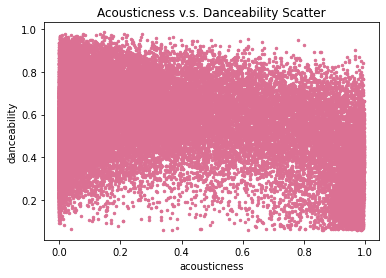

In [8]:
plt.scatter(df['acousticness'], df['danceability'], s=6, color=['palevioletred'], label='asd')
plt.xlabel('acousticness')
plt.ylabel('danceability')
plt.title('Acousticness v.s. Danceability Scatter')
plt.show()

We firstly tend to believe that there exists a clear linear relationship between **acousticness** and **danceability**, but it seems the data is distributed everywhere, so there is no such obvious association between **acousticness** and **danceability**.

Since the **mode** only has two values, the **key** is the only categorical feature that contains about 10 keys, we want to look at its visual relationshuip with the final genre.

<a id='histogram'></a>

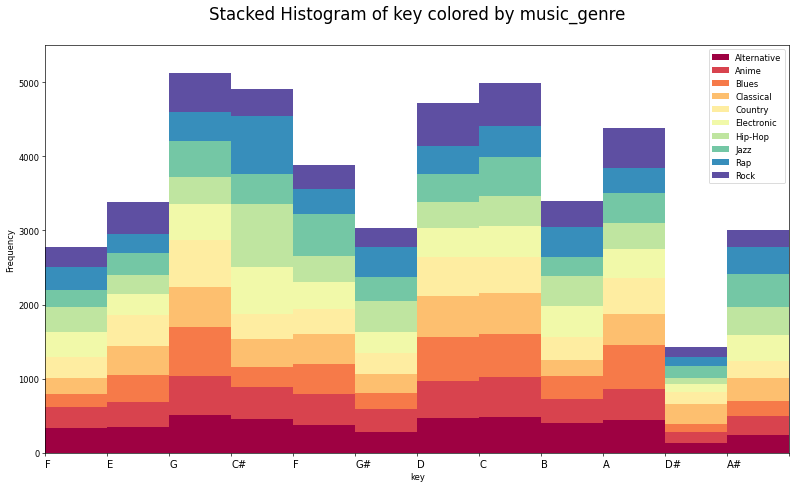

In [9]:
x_var = 'key'
groupby_var = 'music_genre'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
plt.figure(figsize=(16,9), dpi=60)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
# Design
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Stacked Histogram of key colored by music_genre\n", fontsize=20)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xlim(0, 11)
plt.ylim(0, 5500)
plt.xticks(ticks=bins, labels='F,E,G,C#,F,G#,D,C,B,A,D#,A#,'.split(','), va='top', ha='left', size=12)
plt.show()

We found that for each key, the music genre given that key is distributed generally and evenly. It is so difficult to find a pattern for music genre given the key, this means that using a key to predict genre is not convincing enough, so we will **not** use key as the main categorical feature. We asked our music major friends, the response is that a composer may not only focus on one key to produce one genre, the composer tends to find the inspiration and then confirm the key later on. In our project, if necessary, we will include it in futre model evaluations. 

**As conclusion, we believe that key will not improve any models in general.**

Then, we want to explore the correlation betweeen the input features. <a id='heatmap'></a>

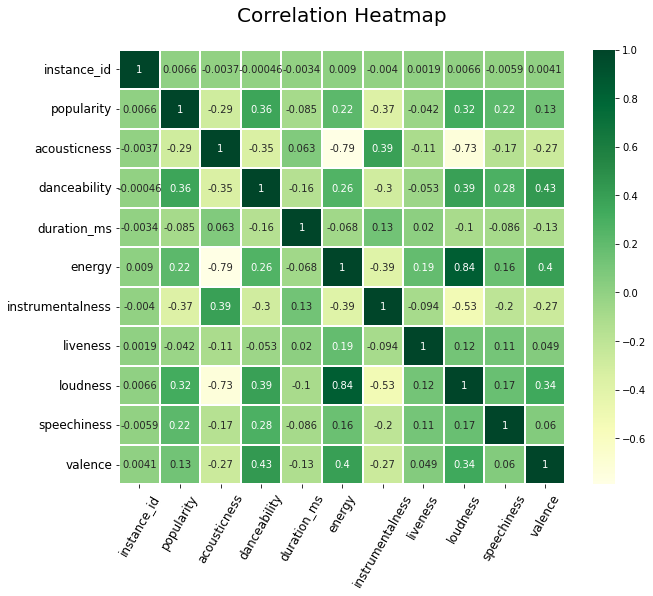

In [12]:
data = df
plt.figure(figsize=(10, 8))
key_list = df.columns
sns.heatmap(data.corr(),linewidths=0.1, annot=True,cmap='YlGn')
plt.title('Correlation Heatmap\n', size=20)
plt.xticks(fontsize=12, rotation=60) 
plt.yticks(fontsize=12, rotation=0) 
plt.show()

## First Naive Attempt: Logistic Regression

To start with, we decided to perform simple logistic regression to give a basic sense of this multi-label classification. We expect the result to be bad($\leq$ 40%), we will implement more models later on after this checkpoint.

In [13]:
#drop non-numeric columns for basic baseline logistic regression model for our first trial
df_lr = df.copy()
df_lr = df_lr.drop(columns=['instance_id', 'artist_name', 'track_name', 'key', 'mode'])
cols = df_lr.columns
correct_types = [float, float, float, float, float, float, float, float, float, float, float, str]
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df_lr[col] = df_lr[col].map(cols_dict[col], na_action='ignore')
df_lr.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic


In [14]:
#check no missing data
if df_lr.isnull().values.any():
    warnings.warn("missing data")
df_lr.isnull().sum().sum()

0

In [15]:
#new shape of well-formed data
df_lr.shape

(45020, 12)

In [16]:
#extract X and y from dataset to create train test split
X = df_lr.iloc[:,:-1]
y = df_lr.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check shape of train and test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30163, 11)
(14857, 11)
(30163,)
(14857,)


Perform Logistic Regression.

<a id='logisticresult'></a>

In [17]:
#train baseline logistic regression model
clf = LogisticRegression(C=1, random_state=0, penalty='l2', multi_class='multinomial', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial',
                   random_state=0)

In [18]:
#Evaluate performance on test set
predicted = clf.predict(X_test)

#get f1 score for baseline model
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted, average="micro"))

0.29588746045635056


### Reflection on the first attempt

The accuracy is roughly the same as we expected, we know that multi-label classification needs other models that can perform better than logistic regression.

After the result of logistic regression, we decided to implement the ensemble learning models and the neural networks. We will implement Random Forest, AdaBoosting, and Neural Networks, and then compare and evaluate their performance.

# Models: Random Forest / AdaBoosting / Neural Network

## Random Forest

We will try a Random Forest Classifier using sklearn's RandomForestClassifier package.

Clean up data.

In [19]:
df_rf = df.copy()

#confirm no missing data
print("missing:", df_rf.isnull().sum().sum())

#check shape of data
print("shape:", df_rf.shape)

df_rf.head()

missing: 0
shape: (45020, 17)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [20]:
#check all unique modes
modes = df_rf['mode'].unique()
print(sorted(modes))

#drop non-relevant columns
df_rf = df_rf.drop(columns=['instance_id', 'artist_name', 'track_name', 'key'])

#encode mode as integer 0 or 1 to use in random forest classifier
df_rf['mode'] = df_rf['mode'].apply(lambda x: 1 if x == 'Major' else 0)

['Major', 'Minor']


We set the correct types for the columns:

In [21]:
#set column types correctly
cols = df_rf.columns
correct_types = [float] * 12
correct_types.append(str)
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df_rf[col] = df_rf[col].map(cols_dict[col], na_action='ignore')
df_rf.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1.0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1.0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1.0,0.0413,145.036,0.323,Electronic


Create train test split:

In [22]:
# extract feature data
X = df_rf.iloc[:,:-1]

# extract true labels
y = df_rf.iloc[:,-1]

# split data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check shape of train and test split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31514, 12)
(13506, 12)
(31514,)
(13506,)


Create model and grid search for hyperparameters.

<a id='rf-acc'></a>

In [43]:
clf = RandomForestClassifier(random_state=42)

In [44]:
param_grid = { 
    'n_estimators': [100, 200, 500], # number of trees
    'max_features': ['sqrt', 'log2'], # number of attributes from perturbation
    # default is sqrt, we would guess to do log of d features
    'max_depth' : [5, 10], # max depth of tree, None = until the leaf is pure
}

In [45]:
clf_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
clf_rfc.fit(X_train, y_train)
clf_rfc.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}

In [46]:
clf = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10, max_features='sqrt')
clf.fit(X_train, y_train)
#Evaluate performance on test set
predicted = clf.predict(X_test)

Evaluate performance of model:

In [47]:
f1score = f1_score(y_test, predicted, average="micro")
print('f1 score %f' % f1score)
precision = precision_score(y_test, predicted, average='micro')
print('precision: %f' % precision)
recall = recall_score(y_test, predicted, average='micro')
print('recall: %f' % recall)

f1 score 0.573227
precision: 0.573227
recall: 0.573227


Using the random forest classifier resulted in a precision, recall, and f1 score of 0.574. This is a general good score for multiclassification on a model that can predict over 10 different labels.

With a accuracy score of around 0.574 we can predict in a size of 10000 that 5750 will be correctly labeled as the correct music genre. 

Increasing the number of trees (n_estimators) to 500 instead of the default 100, increasing it further made a negligible difference in performance.

Further, we tried to do log on features to determine the number of selected features in the tree, it turns out square root is still the choice,

We encoded the mode column as integers 0 or 1 to make it the correct numeric format for the random forest classifier. 

Overall, this model heavily outperformed the baselines logistic regression model with 0.29 f1 score with almost double accuracy.

## AdaBoosting

As introduced in lectures and also [Adaboost Blogs](https://blog.paperspace.com/adaboost-optimizer/), we decide to try out boosting to try to improve on our weaker networks like in decision trees to try to reduce errors from previous models. This hopefully will give us a more accurate score on the accuracy.

**Note: We also tried SVM as our estimator but it took too long due to our 40k datapoints but we estimate it wouldn't be significant.**

In [48]:
#Make a copy of data to alter. Should still lack null values and remain the same shape.
df_ab = df.copy()
print("missing:", df_ab.isnull().sum().sum())
print("shape:", df_ab.shape)
df_ab.head()

missing: 0
shape: (45020, 17)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


We sort the mode so that we can one hot encode these values before dropping our instance_id, artist_name, track_name and key either due to too many values to one hot encode or not being relevant to our anaylsis due to ethics like the instance_id. We encode major as 1 and minor as 0 to make the difference minimal but to have a difference between the two.

In [49]:
modes = df_ab['mode'].unique()
sorted(modes)

#Drop unneeded columns
df_ab = df_ab.drop(columns=['instance_id', 'artist_name', 'track_name', 'key'])
#One-hot encoding
df_ab['mode'] = df_ab['mode'].apply(lambda x: 1 if x == 'Major' else 0)

First we convert the data to floats to have one type to compare to for our later algorithms. This way we can work with one data type except the last column that we will use to compare. This code block just converts all those numbers to the correct type by the for loop. Then we visualize the data.

In [50]:
cols = df_ab.columns
correct_types = [float, float, float, float, float, float, float, float, float, float, float, float, str]
cols_dict = dict(zip(cols, correct_types))
for col in cols_dict:
    df_ab[col] = df_ab[col].map(cols_dict[col], na_action='ignore')
df_ab.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1.0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1.0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1.0,0.0413,145.036,0.323,Electronic


In [51]:
#extract X and y from dataset to create train test split
X_ab = np.array(df_ab.iloc[:,:-1])
y_ab = np.array(df_ab.iloc[:,-1])

In [52]:
#Split up our data into test and training similar to previous models.
X_train, X_test, y_train, y_test = train_test_split(X_ab, y_ab, test_size=0.3, random_state=42)

Use grid search to tune the best common hyperparameters.

<a id='adagridsearch'></a>

In [57]:
#Define a AdaBoost Classifier
abc = AdaBoostClassifier(random_state=42)

param_grid = { 
    'n_estimators': [50, 100, 150], # number of trees
    'learning_rate': [0.001, 0.1, 1],
}
clf_abc = GridSearchCV(estimator=abc, param_grid=param_grid, n_jobs=-1, cv=3,
                       scoring='accuracy')
# Train the Adaboost Classifer
clf_abc.fit(X_train, y_train)
clf_abc.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

Use the best parameteres to predict the response for test dataset.

In [58]:
abc = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=0.1)
y_pred = model.predict(X_test)

In [59]:
metrics.accuracy_score(y_test, y_pred)

0.4931882126462313

From the grid search, we found that the best hyperparameters came from the highest number of trees, so we will now increase n_estimator and see that the accuracy drops when we have more trees.

<a id='adab-acc'></a>

In [64]:
#Define a AdaBoost with a higher n_estimators and learning rate and using Decision Tree Classifier
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.1)
# Train the Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.525396120242855

Below is the code to try out SVM that never finished. **Warning: Don't uncomment it and run. This is just an unfinised exploration.**

In [65]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
#svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
#abc =AdaBoostClassifier(n_estimators=10, estimator=svc,learning_rate=1)

# Train Adaboost Classifer
#model = abc.fit(X_train, y_train)
#Predict the response for test dataset
#y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Using the f1_score we can calculate out the f1_score as well as precision and recall to see that they are about the same showing they are consistent to this number with the macro scoring.

In [66]:
print(f1_score(y_test, y_pred, average="micro"))
precision = precision_score(y_test, y_pred, average='micro')
print('precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='micro')
print('recall: %f' % recall)

0.525396120242855
precision: 0.525396
recall: 0.525396


From these results we can see that our f1 score is not good as randomforest which means that using AdaBoost does not increase how accurate these models are as it seems like the default is around the best balance we can get as increasing or decreasing either our n_estimators or our learning rate results in subtle improvement. With a peak accuracy score of around 0.525 we can predict in a size of 10000 that 5250 will be correctly labeled as the correct music genre. 

It seems like with just using decision trees as our backing model for the Boosting may not be the most accurate if there is a more accurate model to use for the boosting. Perhaps SVM may have resulted in a slightly higher or lower score but with a model that should not rely on tuning parameters and avoiding overfitting, this may be the best result we are going to get. Looking at the f1 score and our precision and accuracy we can see that they are fairly similar.

Further, compare to bagging ensemble: Randomforest, boosting is not actually improving, the reason is possibly that the features have very close range. So in each weak learner, the later ones cannot really understand how to focus on those mis-classified ones since there are 9 possible options left, so the improvement is subtle when we increase the number of learners and reach to a limit.

Our Model itself seeing that it has the best score of our 0.52 means that this accuracy is not nearly high enough to justify being able to say the model does a good job at making these predictions and that these labels alone cannot correctly guess the music genre. Even with tuning we can see that the score can only get worse as we mess with the parameters meaning that this is the model prediction our model is going to provide for us for AdaBoosting. 

Comparing it to our Logistical Regression we get a better idea of the accuracy compared to our baseline as we are doing a more multi-class classification where various factors can influence our prediction rather than a simple classification. In fact the point of the boosting is to learn from the weaker models like Logistical Regression and be able to improve upon them so it makes sense that using the decision tree would have more of a higher standard for accuracy than our baseline of Logistical. 


## Neural Network

As introduced in lectures and also [neural network playground](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-gauss&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.95155&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false), we decide to try out the implementation of a relative-simple neural network. 

**Note: This neural network is an beginner exploration since we are not sure whether we can tune a solid network from 40k data before the deadline, so please grade our design and implementation more than our accuracy. Thank you.**

In [72]:
df_n = df.copy()
print("missing:", df_n.isnull().sum().sum())
print("shape:", df_n.shape)

missing: 0
shape: (45020, 17)


No missing data exists. Then we want to one-hot encoding the categorical features. Take a look at them and do one-hot encoding via sklearn

Key has over 12 unique values, we all agree that this key will have little influence on the genre since the key of a music does not reflect any information, so we will do Sklearn One-Hot Encoder on **mode**.

In [73]:
df_n = df_n.drop(columns=['instance_id', 'artist_name', 'track_name', 'key'])
df_n['mode'] = df_n['mode'].apply(lambda x: 1 if x == 'Major' else 0)

Conver type of **tempo** into float.

In [74]:
df_n['tempo'] = df_n['tempo'].map(float)

Convert duration **unit** from ms to min.

In [75]:
df_n['duration_ms'] = df_n['duration_ms'].apply(lambda x: np.round(x/60000, 3))
df_n = df_n.rename(columns={'duration_ms':'duration'})

In [76]:
one_data = df_n.iloc[118,:]
for i in range(len(one_data)):
    if type(one_data[i]) not in [np.dtype('float64'), np.dtype('int64')]:
        print("Not numerics:", df_n.columns[i])

Not numerics: music_genre


Now, every feature is numeric, we round the decimal into 3 digits.

In [77]:
df_n = df_n.round(3)

The above data is ready to implement neural networks. First, shuffle the dataframe to break the continuous labels.

After we ran the first time of our neural network, we found that training a neural network on 40000 data takes about 30 minutes to fit the model. After fully consideration about running time, we decide to abandon the k-fold cross validation to split the test and train set. That is if we use k=5, we need to train up to 5 times which will cause up to 2.5 hours for one iteration of running the notebook. Instead, we use the sklearn shuffle to shuffle the dataset randomly and pick the first 35000 data as train. We know that this shuffle will create some sort of bias, we  selected the shuffle since a training set of size 35000 will decrease the bias generally. In conclusion, We will use first 35000 as train data, the rest as test set.

**We apologize for the skip of k-fold cross validation but running several normal neural networks in one iteraion will take the entire day off, and we still need to optimize its hyperparameters in the future.**

In [78]:
# shuffle dataset
df_nn = shuffle(df_n, random_state=42)
print(df_nn.shape)
df_nn.head()

(45020, 13)


,popularity,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
48115,58.0,0.157,0.918,2.829,0.834,0.0,0.065,-6.210,1,0.094,128.006,0.842,Hip-Hop
26320,53.0,0.360,0.600,4.521,0.619,0.0,0.106,-9.709,0,0.202,103.908,0.308,Rap
45661,66.0,0.054,0.803,4.879,0.640,0.0,0.342,-4.527,0,0.028,131.986,0.038,Hip-Hop
5294,12.0,0.038,0.559,3.602,0.980,0.0,0.335,-2.184,0,0.239,178.020,0.536,Anime
22733,39.0,0.082,0.660,2.924,0.845,0.0,0.319,-7.032,1,0.039,138.430,0.861,Country


In [79]:
X_nn = np.array(df_nn.iloc[:,:-1])
y_nn = np.array(df_nn.iloc[:,-1])

Encode Y label into numerical values.

In [80]:
'''encode label'''
print(set(y_nn), "\n number of labels:", len(set(y_nn)))
encoder = LabelEncoder()
encoder.fit(y_nn)
encoded_Y = encoder.transform(y_nn)
y_nn = np_utils.to_categorical(encoded_Y)

{'Hip-Hop', 'Anime', 'Classical', 'Alternative', 'Blues', 'Rock', 'Electronic', 'Jazz', 'Rap', 'Country'} 
 number of labels: 10


In [81]:
'''Select first 35000 data as training'''
test_size = 35000
X_train_nn, X_test_nn = X_nn[:test_size, :], X_nn[test_size:, :]
y_train_nn, y_test_nn = y_nn[:test_size], y_nn[test_size:]

The categorical y should be shape of (45020, 10) since there 10 labels. Now we can begin the trainning. Create model here.

In [82]:
def create_model():
    '''base model here'''
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train_nn.shape[1],), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    '''grid search for batch_size and epoch, so need to compile'''
    # compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', # instead of binary_crossentropy
                  metrics=['accuracy'])
    return model

Perform grid search.
<a id='n-gridsearch'></a>

In [83]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_nn, y_train_nn)

Evaluate the performance.

In [84]:
'''evaluate the performance'''
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.528372 using {'batch_size': 10, 'epochs': 100}
0.504229 (0.011699) with: {'batch_size': 10, 'epochs': 50}
0.528372 (0.018014) with: {'batch_size': 10, 'epochs': 100}
0.505257 (0.001642) with: {'batch_size': 20, 'epochs': 50}
0.525429 (0.010485) with: {'batch_size': 20, 'epochs': 100}
0.487571 (0.021326) with: {'batch_size': 40, 'epochs': 50}
0.522029 (0.009422) with: {'batch_size': 40, 'epochs': 100}


Use the best parameter to fit model.

In [85]:
model = Sequential()
model.add(Dense(12, input_shape=(X_train_nn.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', # instead of binary_crossentropy
                  metrics=['accuracy'])
model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=10, verbose=0)

Now use test set to evaluate metrics.

<a id='nn-acc'></a>

In [86]:
y_true = np.argmax(y_test_nn, axis=1)

In [87]:
y_pred_probs = model.predict(X_test_nn, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

Precision and F1 score

In [88]:
precision = precision_score(y_true, y_pred, average='micro')
print('precision: %f' % precision)
f1 = f1_score(y_true, y_pred, average=None)
print("complete f1 for each class:", f1)
f1_micro = f1_score(y_true, y_pred, average='micro')
print('micro f1: %f' % f1_micro)
f1_macro = f1_score(y_true, y_pred, average='macro')
print('macro f1: %f' % f1_macro)

precision: 0.534731
complete f1 for each class: [0.30095759 0.67771819 0.49017682 0.82154171 0.43912176 0.57974138
 0.51480263 0.49360493 0.36507042 0.59280695]
micro f1: 0.534731
macro f1: 0.527554


As we can see, the f1 score is not high, it stays around 0.535, a medium precision score (around 0.5 - 0.7) means the classifier has a small(not very low) portion of False Positives and True negatives. 

0.535 precision means we given 10000 test size, we predict around 5400 of them into the correct music genre.

To perform a multi-class classification, F-1 score is preferable when we have imbalanced class distribution or we are looking for a balanced measure between precision and recall. We found that clearly, the neural network needs more tuning and optimization since this dataset size is not small compared to our computer's size. This network's epochs, optimizer, momentum, and the hidden layer settings can be better. Unfortunately, we have a time limit during the final week, so further improvement might be developed in the future. 

Model-wise, in the training set, the best score of grid search accuracy is around 0.54, which is not high enough as well. We are not sure that given a 13 feature input and 10 label neurons output, what size of hidden layer should be better. We have to say that we did it with only 1 hidden layer, but with 2 or 3 hidden layers that contain less hidden neuron, the performance might be better. The only restriction is the time. We ran the 2 layers that have 6 neurons each, it took around 45 min to complete the model. And this is kind of impossible to apply the grid search on it, so we choose to use a simpler one and perform the grid search.

This is our first trial of tuning a neural network. The running time is pretty long, that each fit of data will take more than 20 minutes. This is understandable since the data size is not small. How to speed up the model is one of our questions in the future.

# Discussion

## Result

Classifying genre based on the features provided, even with our best model, was difficult to obtain high(70%+) accuracy and meet public expectations of a classifier.

It is difficult to reach a high level of accuracy for 10-label classification because there are so many possible classes. Genre is a problem that makes this difficult because songs often belong to multiple genres or some genres are obscure. This means that while each of the songs are clearly labelled as a single genre, the differences in their input features may be very minimal as the line between different genres can be hard to determine. We tried different ensembles such as random forest and adaboost and even a neural network but none of the models could reach greater than 0.6 $f_1$ score. We likely get stuck at this point because the input features are similar across genres.

After analyzing our results, we were satisfied of the increase in accuracy we got, going from 0.29 $f_1$ score in our baseline logistic regression model to 0.573227 in our best model, the random forest. While we did increase our accuracy significantly through hyperparameter tuning for each model, we are aware that if the public were to use our classifier, it would likely fall short of their expectations because they would want high accuracy. 

Time limit is our main concern: optimizing models takes much more time than we expected. We think that with more time, we could have gotten closer to over 70%, which is our ultimate goal.

## Limitations and Improvements

- We had limited time to run and visualize all of the models. We could likely increase model performance with more in-depth hyperparameter tuning if we had more time to run longer. Running grid search over increasing number of parameter selections increasing compute time very quickly so we had to only cover relatively few values for each hyperparameter.

- The tree was large and the neural network was very large, which made it hard to visualize the models purely due to their size. Visualizations were smushed together and clunky due to the size.

- Our best end result performance was around 0.574. While this is not bad given 10 classes, it likely falls short of people's expectations for a classifier where many people would expect over 80% accuracy.

- People’s exact definitions of genre are constantly evolving making it hard for a machine to exactly classify genre since it is an issue humans have. Due to this complexity it makes it difficult and nearly impossible to perfectly classify just using a machine. As a result it makes it not very convincing to be able to perfectly label a genre and leaves plenty of room for error making it a limitation to our model.

## Ethics & Privacy

Due to the fact that each song labeled with artist and the name of the song there is the problem of these being identifiable and since this data is likely not important to our analysis we will not reflect specific songs in our analysis and try to avoid biases due to song selections in our fold selection to the best of our ability. We will have our data highlight only the important aspects of the analysis that will not have identifiable links back to the data. We will have the songs instead represented as meaningless id code labels that will have no relation to the song or artist themselves to avoid potential bias in our data analysis and will instead focus on the other factors about the songs to focus instead on predicting the genre based on those quantifiable aspects rather than inherent biases we may unintentionally have if we based it on song or artist names. Due to the nature of us scrapping data that we ourselves did not collect we will comb through the data to make sure that there are no ethical issues with the data collection. We will make sure that all genres are properly represented in valid ways and that our data analysis relys on purely numerical data that is comparable rather than our own bias. Furthermore if any ethical dilemas come up during or after our research we plan on adjusting our data to handle or remove ethical concerns within our modeling and deployment of the analysis. We will have our data in a comparable and categorical manner where we weigh our data properly but if these factors are found to not be properly utilized or have a bias that affects our ethics we will try to reflect this in our final project.

Also, classifying music genre is a process about classifying music and making people more aware of music, which does not involve any extreme,  negative,  or positive evaluations. All output results, regardless of real facts, are objective from computer evaluation and will not negatively mislead society or the public. Further, we will also state that this scientific classification is only used as a reference in machine learning. When people are really willing to try to get in touch with music genre, they should consider everything comprehensively from both objective facts and subjective opinions. 

We all believe **Appreciation and Analysis of Music requires both rationality and sensibility**.

## Conclusion
Trying to reach a high accuracy with 10-label classification is not easy, with our three models we were not able to get our accuracy over 60%. Our highest accuracy being the Random Forest shows that we can find a decent accuracy that averages around 55% between our three models but is still not a perfect representation. However, this even connects to another problem with the main point in general as classifying music genres is tough for a human to do, let alone a machine learning algorithm. In general this shows based on our data that considering the issue of classifying an ever changing concept we have a manageable accuracy that we could only improve on. 

Some future work we can do would be to try to test specific factors against each other or try out different scenarios like SVM as our estimator for AdaBoosting, trying out XGBoost, and further training our neural network that we did not have the time for in a classroom setting. We believe that while we did not reach our goal of 70% accuracy that we have still found a good understanding of our data and have trained our models well to represent a good enough accuracy of classification with our 10 genre labels.

# Team Expectations 

* Be nice and supportive.
* Communicate through Discord, respond in time.
* Reach agreement to changes.
* Ask for help if necessary, help if you can.
* Vote for conflicts.
* Don't delete anything without permission except individual scratch.
* Finish as our schedule.

# Project Timeline

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/17  |  2 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss final project topic; Discuss hypothesis; Dackground research; Build proposal | 
| 2/22  | 2 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/28  |  2 PM |  Start | Discuss ideal dataset(s) and ethics; Load data; Find relevant music knowledge; Solve potential concerns | 
| 3/7  | 2 PM  | Import & Wrangle Data ,EDA  | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/14  | 2 PM  | Finalize wrangling/EDA; Programming for project  | Edit project code; Complete project |
| 3/22 | Before 5 PM  | Report | Turn in Final Project  |

# Footnotes
<a name="wikinote1"></a>1.[^](#wiki1): (16 February 2023) History of Music Wikipedia. https://en.wikipedia.org/wiki/History_of_music<br>
<a name="wikinote2"></a>2.[^](#wiki2): (9 February 2023) Music genre Wikipedia https://en.wikipedia.org/wiki/Music_genre#:~:text=A%20music%20genre%20or%20subgenre,a%20wide%20variety%20of%20subgenres<br>
<a name="newyorkernote"></a>3.[^](#newyorker): (15 March 2021) Genre Is Disappearing. What Comes Next? https://www.newyorker.com/magazine/2021/03/15/genre-is-disappearing-what-comes-next